## **LABORATORIO 4**

#### Universitario: Aly Delgado Danner Abel    

**CU: 35 - 5281  Ing. de Sistemas**
                        **CU: 104 - 794  Ing. en Diseño y Animación Digital**

Link del Dataset: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

Realizaremos el analisis de el dataset Intel Image Classification. Para probar la efectividad de un modelo de Regresión logística multiclase en conjuntos de imagenes un poco sofisticadas de 150 x 150.

Se vectorizara cada una de las imagenes guardando todos los datos en archivos .mat
Uno para **Train** y otro para **Test** . A continuación los tipos de clase a los que pueden corresponder cada una de las fotografias:

**Valores para Y ->**

0.   Buildings
1.   forest
2.   glacier
3.   mountain
4.   sea
5.   street





---
#### 1.   Importación del **Dataset**







Inicialmente Importamos las librerias que utilizaremos

In [2]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

from scipy.io import savemat

from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import pandas as pd

import cv2

from scipy.io import savemat

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Nuestro Dataset consta de imagenes (150px x 150px) de 6 categorias, por lo que llevaremos estos datos a un archivo .mat y asi poder tratarlos de mejor manera**

##### Primero vectorizamos la carpeta que contiene los datos de entrenamiento

In [2]:
import os
import numpy as np
import cv2
from scipy.io import savemat

# Ruta a la carpeta principal del dataset
dataset_folder = r'D:\estudio\IA\repos\1\Inteligencia-Artificial-I\LABORATORIOS\LABORATORIO 4\dataset\intel\seg_train\seg_train'

# Inicializar listas para almacenar las imágenes y etiquetas
images = []
labels = []

# Definir las clases y asignarles un índice
clases = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
clase_indices = {clase: idx for idx, clase in enumerate(clases)}

# Iterar sobre cada clase
for clase in clases:
    clase_folder = os.path.join(dataset_folder, clase)
    label = clase_indices[clase]

    # Iterar sobre cada imagen en la carpeta de la clase
    for image_name in os.listdir(clase_folder):
        image_path = os.path.join(clase_folder, image_name)

        # Leer la imagen usando OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
        if image is not None:
            # Redimensionar la imagen a 150x150 píxeles
            image = cv2.resize(image, (150, 150))
            images.append(image)
            labels.append(label)

# Convertir las listas a arrays de numpy
images = np.array(images)
labels = np.array(labels)

# Guardar las matrices de imágenes y etiquetas en un archivo .mat
savemat('dataset.mat', {'images': images, 'labels': labels})

##### Segundo vectorizamos la carpeta que contiene los datos de prueba

In [ ]:
# Ruta a la carpeta principal del dataset
dataset_folder = r'D:\estudio\IA\repos\1\Inteligencia-Artificial-I\LABORATORIOS\LABORATORIO 4\dataset\intel\seg_test\seg_test'

# Inicializar listas para almacenar las imágenes y etiquetas
images = []
labels = []

# Definir las clases y asignarles un índice
clases = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
clase_indices = {clase: idx for idx, clase in enumerate(clases)}

# Iterar sobre cada clase
for clase in clases:
    clase_folder = os.path.join(dataset_folder, clase)
    label = clase_indices[clase]

    # Iterar sobre cada imagen en la carpeta de la clase
    for image_name in os.listdir(clase_folder):
        image_path = os.path.join(clase_folder, image_name)

        # Leer la imagen usando OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
        if image is not None:
            # Redimensionar la imagen a 150x150 píxeles
            image = cv2.resize(image, (150, 150))
            images.append(image)
            labels.append(label)

# Convertir las listas a arrays de numpy
images = np.array(images)
labels = np.array(labels)

# Guardar las matrices de imágenes y etiquetas en un archivo .mat
savemat('dataset_test.mat', {'images': images, 'labels': labels})

##### Preparacion de "X" y "y" para los valores de Entrenamiento

In [3]:
# Ingresar imágenes de 150x150
input_layer_size = 150 *150

# 6 etiquetas, de 0 a 5 (buildings, forest, glacier, mountain, sea, street)
num_labels = 6

# Datos de entrenamiento almacenados en los arreglos X, y
data = loadmat('/content/drive/MyDrive/datasets/lab4/intel/dataset.mat')
X, y = data['images'], data['labels'].ravel()

# Verificar las dimensiones de las imágenes y etiquetas
print(X.shape)  # Debería ser (n_imágenes, 150, 150)
print(y.shape)  # Debería ser (n_imágenes,)

# Aplanar las imágenes de 150x150 a 22500
X = X.reshape(X.shape[0], -1)

# Verificar las nuevas dimensiones de X
print(X.shape)  # Debería ser (n_imágenes, 22500)
print(y.shape)  # Debería ser (n_imágenes,)

m= y.size

(14034, 150, 150)
(14034,)
(14034, 22500)
(14034,)


##### Preparacion de "X" y "y" para los valores de prueba

In [4]:
# Ingresar imágenes de 150x150
input_layer_size_test = 150*150

# 6 etiquetas, de 0 a 5 (buildings, forest, glacier, mountain, sea, street)
num_labels_test = 6

# Datos de entrenamiento almacenados en los arreglos X, y
data = loadmat('/content/drive/MyDrive/datasets/lab4/intel/dataset_test.mat')
X_test, y_test = data['images'], data['labels'].ravel()

# Verificar las dimensiones de las imágenes y etiquetas
print(X_test.shape)  # Debería ser (n_imágenes, 150, 150)
print(y_test.shape)  # Debería ser (n_imágenes,)

# Aplanar las imágenes de 150x150 a 22500
X_test = X_test.reshape(X_test.shape[0], -1)

# Verificar las nuevas dimensiones de X
print(X_test.shape)  # Debería ser (n_imágenes, 22500)
print(y_test.shape)  # Debería ser (n_imágenes,)

m_test= y_test.size

(3000, 150, 150)
(3000,)
(3000, 22500)
(3000,)


In [5]:
print(X)
print(y)

print(m)

df = pd.DataFrame(X)

df


[[247 247 248 ...  27  47  59]
 [113 114 113 ...  19  60  61]
 [181 181 181 ... 137 131 135]
 ...
 [ 62 116 102 ... 152 131 141]
 [ 20  21  21 ...   5   1   0]
 [107 114 207 ...  98 125 144]]
[0 0 0 ... 5 5 5]
14034


,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,247,247,248,248,249,249,249,249,248,249,...,39,25,46,17,49,9,42,27,47,59
1,113,114,113,111,111,113,114,112,113,112,...,30,18,12,4,11,16,6,19,60,61
2,181,181,181,181,181,181,181,181,182,182,...,125,135,131,126,141,143,132,137,131,135
3,196,168,171,167,169,171,167,161,162,170,...,202,203,202,196,241,231,219,232,227,235
4,26,26,27,27,27,27,27,27,27,27,...,222,113,92,180,14,240,185,219,203,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,251,251,253,250,253,255,252,255,255,252,...,81,100,58,61,71,102,67,95,75,85
14030,95,82,85,90,91,89,108,94,88,86,...,114,115,115,117,119,118,117,116,115,115
14031,62,116,102,59,185,58,79,116,170,172,...,132,130,145,146,145,145,135,152,131,141
14032,20,21,21,20,19,18,17,16,19,19,...,2,0,0,2,3,0,1,5,1,0


#### Preparación de los datos

In [6]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [7]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [8]:
print(X_norm)
print(mu)
print(sigma)

[[ 1.55873403  1.55020613  1.56364035 ... -0.86534724 -0.53104523
  -0.33195569]
 [-0.28389566 -0.2796228  -0.30309658 ... -0.9958427  -0.32033186
  -0.29947901]
 [ 0.65117015  0.64217072  0.63718573 ...  0.9289654   0.83048732
   0.90215817]
 ...
 [-0.98519501 -0.25210657 -0.45520107 ...  1.1736444   0.83048732
   0.99958821]
 [-1.56273566 -1.55912724 -1.57524323 ... -1.22420977 -1.2766464
  -1.29001777]
 [-0.36640146 -0.2796228   0.99670543 ...  0.29280001  0.733235
   1.04830323]]
[133.64550378 134.32421263 134.91955252 ...  80.04995012  79.76293288
  79.44271056]
[72.72215421 72.68439021 72.3187065  ... 61.30481248 61.69518286
 61.58264834]


 X normalizada

In [9]:
df = pd.DataFrame(X_norm)

df

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,1.558734,1.550206,1.563640,1.560862,1.571505,1.575815,1.569560,1.551557,1.537865,1.551514,...,-0.682330,-0.901577,-0.568384,-1.039669,-0.512474,-1.166929,-0.625097,-0.865347,-0.531045,-0.331956
1,-0.283896,-0.279623,-0.303097,-0.336917,-0.342665,-0.315225,-0.305100,-0.332164,-0.327422,-0.341506,...,-0.827001,-1.014205,-1.120419,-1.252125,-1.134966,-1.052531,-1.214199,-0.995843,-0.320332,-0.299479
2,0.651170,0.642171,0.637186,0.632751,0.628290,0.630295,0.625286,0.616571,0.625947,0.625730,...,0.700086,0.868305,0.811705,0.741693,0.994612,1.022972,0.847660,0.928965,0.830487,0.902158
3,0.857435,0.463315,0.498909,0.438817,0.461841,0.491248,0.430877,0.341575,0.349608,0.459918,...,1.937831,1.962414,1.964485,1.885688,2.632749,2.461115,2.271324,2.478599,2.386525,2.525992
4,-1.480230,-1.490337,-1.492277,-1.500519,-1.507812,-1.511030,-1.513215,-1.500896,-1.515680,-1.516007,...,2.259323,0.514329,0.178487,1.624203,-1.085822,2.608198,1.714950,2.266544,1.997515,2.396085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,1.613738,1.605239,1.632779,1.588567,1.626988,1.659244,1.611219,1.634055,1.634584,1.592967,...,-0.007197,0.305161,-0.373548,-0.320587,-0.152084,0.352927,-0.215998,0.243864,-0.077201,0.090241
14030,-0.531413,-0.719882,-0.690272,-0.627818,-0.620081,-0.648938,-0.388419,-0.579660,-0.672846,-0.700765,...,0.523265,0.546509,0.551923,0.594608,0.634222,0.614408,0.602200,0.586415,0.571148,0.577391
14031,-0.985195,-0.252107,-0.455201,-1.057242,0.683774,-1.079984,-0.791123,-0.277165,0.460144,0.487554,...,0.812608,0.787856,1.039013,1.068549,1.060137,1.055657,0.896752,1.173644,0.830487,0.999588
14032,-1.562736,-1.559127,-1.575243,-1.597486,-1.618778,-1.636172,-1.652078,-1.652143,-1.626215,-1.626549,...,-1.277090,-1.303823,-1.315256,-1.284811,-1.266017,-1.314012,-1.296019,-1.224210,-1.276646,-1.290018


#### Presentacion fotografias en escala de Grises

In [10]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

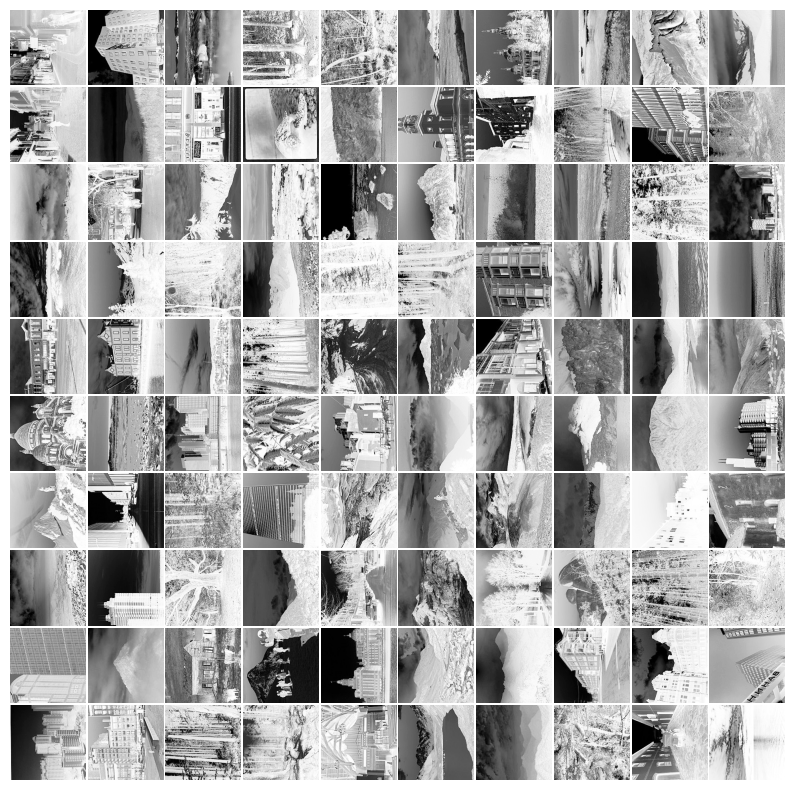

In [11]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [12]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
print(X_t)
# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 0.1

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]


#### Función Sigmoideal

In [13]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

#### Función de calculo del costo y el gradiente para la regresión logística regularizada

In [14]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    # Añade epsilon para evitar el logaritmo de 0
    epsilon = 1e-5
    h = np.clip(h, epsilon, 1 - epsilon)

    temp = theta.copy()  # Usa una copia de theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad


#### Función One vs All
Realiza el entrenamiento de cada clase respecto a las demas y devuelve los parámetros entrenados para cada uno. Lo que devuelve la funcion es un array de arrays (All Theta)

In [16]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

#### Ejecución de todas las funciones

In [17]:
# Definir el parámetro de regularización lambda
lambda_ = 0.1

# Aplicar el enfoque de uno contra todos para entrenar el clasificador
# La función oneVsAll entrenará un clasificador para cada clase en el conjunto de datos
# y devolverá los parámetros theta (pesos) correspondientes a cada clase
all_theta = oneVsAll(X_norm, y, num_labels, lambda_)

#### Predicciones para cada ejemplo de test

In [18]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

(3000, 22500)
Precision del conjuto de entrenamiento: 21.03%
(1, 22500)
(1, 22501)
[2]


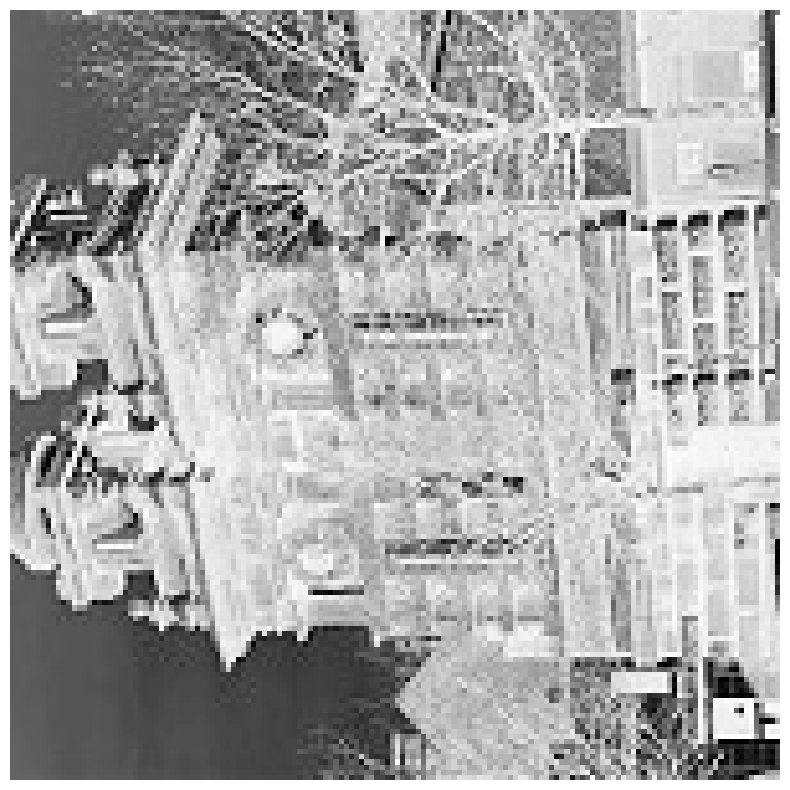

In [19]:
print(X_test.shape)
pred = predictOneVsAll(all_theta, X_test)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_test) * 100))
#Probamos tambien con un ejemplo para ver que valor de Y el modelo nos predice
XPrueba = X_test[2000:2001, :].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

displayData(X[1000:1001, :])

# Conclusión

Podemos verificar que el modelo con datos en escala de grises nos aporta un **21.03 %**.

Para valores del dataset con colores (RGB) el máximo rendimiento de presición que se puede obtener es del 28 % lo que demuestra que nuestro modelo no es tan preciso y se recomienda usar tecnicas diferentes a la regresion logistica multiclase para el entrenamiento y predicción con imagenes de este tipo que llegan a ser mas complicadas.